# Feature Engineering
## Einfuehrung
## Exploration
## Transformation

In [2]:
## prepare: import libraries and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)

ori_data = pd.read_csv('bank_data.csv', sep=';')

### Data Frame

#### Entfernen von Beobachtungen

##### Nach Index

In [6]:
## sandbox
data = ori_data.copy()

## check before
print(data.shape[0])

## drop row by index
idx = (data.age[data.age == max(data.age)].index[0]).tolist()
data.drop(idx, inplace=True)

## check after
print(data.shape[0])

9868
9867


##### Nach Bedingung

In [8]:
## sandbox
data = ori_data.copy()

## check before
print(data.shape)

## drop by condition
data.drop(data[data.age >= 100].index, inplace=True)

## check after
print(data.shape)

(9868, 21)
(9867, 21)


##### Duplikate

In [10]:
## sandbox
data = ori_data.copy() ## sandbox action

## check before
print(data.duplicated().sum())

## drop duplicats
data.drop_duplicates(ignore_index=True, inplace=True)

## check after
print(data.duplicated().sum())

7
0


#### Entfernen von Variablen

##### By Index

* remove variables by index (e.g. first three)

In [14]:
## sandbox
data = ori_data.copy()

## check bevore
print(data.columns[:6])

## drop variables
cols_to_drop = [0, 1, 2]
data.drop(data.columns[cols_to_drop], axis=1, inplace=True)

## alternatively
#data.drop(data.columns[[0, 1, 2]], axis=1, inplace=True)

## check after
print(data.columns[:6])

Index(['age', 'job', 'marital', 'education', 'default', 'housing'], dtype='object')
Index(['education', 'default', 'housing', 'loan', 'contact', 'month'], dtype='object')


##### By Name

* remove variables by name (e.g. marital and education)

In [17]:
## sandbox
data = ori_data.copy()

## check bevore
print(data.columns[:6])

cols_to_drop = ['marital', 'education']
data.drop(cols_to_drop, axis=1, inplace=True)

## alternatively
#data.drop(['marital', 'education'], axis=1, inplace=True)

print(data.columns[:6])
#print(data.head())

Index(['age', 'job', 'marital', 'education', 'default', 'housing'], dtype='object')
Index(['age', 'job', 'default', 'housing', 'loan', 'contact'], dtype='object')


#### Einsetzen von Werten für Missing Values

##### Kategoriale Variablen

In [20]:
## sandbox
data = ori_data.copy()

## check before
print(data.marital.value_counts(dropna=False))

## input mode for NAs
data.marital.fillna(data.marital.mode()[0], inplace=True)

## check after
print(data.marital.value_counts(dropna=False))

marital
married     5747
single      3026
divorced    1076
NaN           19
Name: count, dtype: int64
marital
married     5766
single      3026
divorced    1076
Name: count, dtype: int64


#### Numerische Variablen

* mean or median

In [23]:
## sandbox
data = ori_data.copy()

## check before
print(data.age.isna().sum())

## input median for NAs
data.age.fillna(data.age.median(), inplace=True)

## check after
print(data.age.isna().sum())

123
0


##### Mehrere Variablen gleichzeitig [EXTRA]

In [25]:
## first define a function for nas overview of a data frame
def check_nas(data):
    s = data.isna().sum()
    if len(s[s > 0]) == 0:
        print('no nas found')
    else:
        print('nas found:')
        print(s[s > 0])

## sandbox
data = ori_data.copy()

## check before
check_nas(data)

## create lists of names of of categorical and numerical variables
cat_vars = data.select_dtypes(include='object').columns.tolist()
num_vars = data.select_dtypes(exclude='object').columns.tolist()

## import SimpleImputer class
from sklearn.impute import SimpleImputer

## imput for categorical variables
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[cat_vars] = pd.DataFrame(imp_mode.fit_transform(data[cat_vars]), columns=data[cat_vars].columns)

## check after 1
check_nas(data)

## imput for numerical variables
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
data[num_vars] = pd.DataFrame(imp_median.fit_transform(data[num_vars]), columns=data[num_vars].columns)

## chedk after 2
check_nas(data)

nas found:
age                123
job                 73
marital             19
education          463
duration            51
poutcome          7814
emp.var.rate       247
cons.price.idx     247
cons.conf.idx      247
dtype: int64
nas found:
age               123
duration           51
emp.var.rate      247
cons.price.idx    247
cons.conf.idx     247
dtype: int64
no nas found


### Kategoriale Variablen

#### Reduzieren der Kardinalität

In [28]:
## education: illiterate -> basic.4y

## sandbox
data = ori_data.copy()

## check before
print(data.education.value_counts())   

## education: illiterate -> basic.4y
data.education = np.where(
    data.education == 'illiterate', ## condition
         'basic.4y',                ## if true
          data.education)           ## if false

## check after
print()
print(data.education.value_counts())   

education
university.degree      3136
high.school            2230
professional.course    1307
basic.9y               1251
basic.4y                972
basic.6y                503
illiterate                6
Name: count, dtype: int64

education
university.degree      3136
high.school            2230
professional.course    1307
basic.9y               1251
basic.4y                978
basic.6y                503
Name: count, dtype: int64


#### Numerisieren

##### Faktorisieren

In [31]:
## sandbox
data = ori_data.copy()

## check before
print(data.job.value_counts())

## factorize
data.job = pd.factorize(data.job)[0]

## check after
print(data.job.value_counts())

job
admin.           2630
blue collar      1852
technician       1626
services          856
management        688
retired           621
student           354
self-employed     336
entrepreneur      294
unemployed        271
housemaid         267
Name: count, dtype: int64
job
 3     2630
 2     1852
 1     1626
 8      856
 7      688
 5      621
 6      354
 0      336
 4      294
 10     271
 9      267
-1       73
Name: count, dtype: int64


##### Ordinal Encodieren

In [33]:
## sandbox
data = ori_data.copy()

## check before
print(data.education.value_counts())

## define encoding
replace_nums = {   ## a dictionary of dictionaries
    'education': {
        'illiterate': 0,
        'unknown': 0,
        'basic.4y': 1,
        'basic.6y': 2,
        'basic.9y': 3,
        'professional.course': 4,
        'high.school': 5,
        'university.degree': 6
    }
}
data.replace(replace_nums, inplace=True)

## check after
print()
print(data.education.value_counts())

## variants:
#print(data.education.value_counts().sort_index())

education
university.degree      3136
high.school            2230
professional.course    1307
basic.9y               1251
basic.4y                972
basic.6y                503
illiterate                6
Name: count, dtype: int64

education
6.0    3136
5.0    2230
4.0    1307
3.0    1251
1.0     972
2.0     503
0.0       6
Name: count, dtype: int64


In [34]:
## binary encode

## sandbox
data = ori_data.copy()

## check before
print(data.contact.head())

## binary encode
data['contact'] = np.where(data.contact == 'cellular', 1, 0)
data.rename(columns = {'contact' : 'contact_cellular'}, inplace=True) ## optional

## check after
print(data.contact_cellular.head())

0     cellular
1     cellular
2     cellular
3    telephone
4     cellular
Name: contact, dtype: object
0    1
1    1
2    1
3    0
4    1
Name: contact_cellular, dtype: int32


##### Nominal Encodieren

In [36]:
## sandbox
data = ori_data.sample(6, random_state=1234)

## check before
print(data.marital)

9056      single
9483    divorced
788       single
9554    divorced
809     divorced
4822     married
Name: marital, dtype: object


In [37]:
## default params
new_data = pd.get_dummies(data.marital)
print(pd.merge(data.marital, new_data, left_index=True, right_index=True))

       marital  divorced  married  single
9056    single     False    False    True
9483  divorced      True    False   False
788     single     False    False    True
9554  divorced      True    False   False
809   divorced      True    False   False
4822   married     False     True   False


In [38]:
## param drop_first
new_data = pd.get_dummies(data.marital, drop_first=True)
print(pd.merge(data.marital, new_data, left_index=True, right_index=True))

       marital  married  single
9056    single    False    True
9483  divorced    False   False
788     single    False    True
9554  divorced    False   False
809   divorced    False   False
4822   married     True   False


In [39]:
## param prefix
new_data = pd.get_dummies(data.marital, prefix='marital')
print(pd.merge(data.marital, new_data, left_index=True, right_index=True))

       marital  marital_divorced  marital_married  marital_single
9056    single             False            False            True
9483  divorced              True            False           False
788     single             False            False            True
9554  divorced              True            False           False
809   divorced              True            False           False
4822   married             False             True           False


In [40]:
## may be applied on more variables simultaneously
data = ori_data.copy()
data = pd.get_dummies(
    data,
    columns=['job', 'marital', 'loan'],
    drop_first=True)
print(data.columns)

Index(['age', 'education', 'default', 'housing', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'loan_unknown', 'loan_yes'],
      dtype='object')


In [41]:
## apply for all categorical variables except target

## sandbox
data = ori_data.copy()

## check before
print(data.info())

## prep var list
target = 'y'
sel_vars = data.select_dtypes(include=['object']).columns.drop(target)
data = pd.get_dummies(data, columns=sel_vars, drop_first=True)

## check after
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868 entries, 0 to 9867
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9745 non-null   float64
 1   job             9795 non-null   object 
 2   marital         9849 non-null   object 
 3   education       9405 non-null   object 
 4   default         9868 non-null   object 
 5   housing         9868 non-null   object 
 6   loan            9868 non-null   object 
 7   contact         9868 non-null   object 
 8   month           9868 non-null   object 
 9   day_of_week     9868 non-null   object 
 10  duration        9817 non-null   float64
 11  campaign        9868 non-null   int64  
 12  pdays           9868 non-null   int64  
 13  previous        9868 non-null   int64  
 14  poutcome        2054 non-null   object 
 15  emp.var.rate    9621 non-null   float64
 16  cons.price.idx  9621 non-null   float64
 17  cons.conf.idx   9621 non-null   f

### Numerische Variablen

#### Logarithmieren

In [44]:
## sandbox
data = ori_data.copy()

## check before
print(data.duration.describe()[['mean', '50%']])

## logarithme
data.duration = np.log10(data.duration - data.duration.min() + 1)

## check after
print(data.duration.describe()[['mean', '50%']])

## optionally rename
data.rename(columns = {'duration': 'log_duration'}, inplace=True)
#data.columns

mean    378.159927
50%     258.000000
Name: duration, dtype: float64
mean    2.405733
50%     2.413300
Name: duration, dtype: float64


#### Skalieren (als Ausblick)

##### Normalisieren

In [47]:
## sandbox
data = ori_data.copy()

## check before
print(data.age.describe()[['min', 'max']])

## normalize
data.age = (data.age - data.age.min()) / \
    (data.age.max() - data.age.min())
    
## check after
print(data.age.describe()[['min', 'max']])

min     17.0
max    116.0
Name: age, dtype: float64
min    0.0
max    1.0
Name: age, dtype: float64


##### Standardisieren

In [49]:
## sandbox
data = ori_data.copy()

## check before
print(data.age.describe()[['mean', 'std']])

## standardize
data.age = (data.age - data.age.mean()) / \
    data.age.std()

## check after
print(data.age.describe()[['mean', 'std']])


mean    40.423191
std     11.915715
Name: age, dtype: float64
mean    1.795497e-17
std     1.000000e+00
Name: age, dtype: float64


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


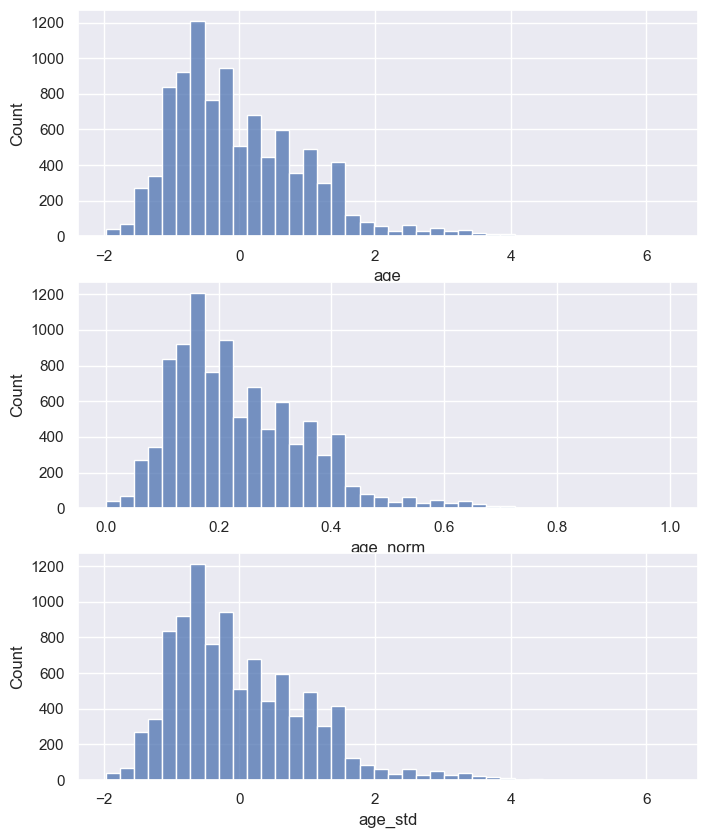

In [50]:
## visual comparison
age_norm = (
    data.age - data.age.min()) / (
    data.age.max() - data.age.min())
age_std = (data.age - data.age.mean()) / data.age.std()

f, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=False)
ax = sns.histplot(data.age.dropna(), bins=40, ax=axes[0])
ax = sns.histplot(age_norm.dropna(), bins=40, ax=axes[1])
ax.set(xlabel='age_norm')
ax = sns.histplot(age_std.dropna(), bins=40, ax=axes[2])
ax.set(xlabel='age_std');

##### Skalieren mit sklearn.preprocessing

In [52]:
## using sklearn.preprocessing.MinMaxScaler

## sandbox: numerical variables only
data = ori_data.select_dtypes(exclude=['object'])

## check before
print(data.describe().loc[['min', 'max']])

## import scaler class
from sklearn.preprocessing import MinMaxScaler

## define scaler
scaler = MinMaxScaler().set_output(transform='pandas')

## apply scaler on data frame
data = scaler.fit_transform(data)

## check after
print(data.describe().loc[['min', 'max']])

       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
min   17.0       0.0       1.0    0.0       0.0          -3.4          92.201   
max  116.0    4199.0      43.0  999.0       6.0           1.4          94.767   

     cons.conf.idx  euribor3m  nr.employed  
min          -50.8      0.634       4963.6  
max          -26.9      5.045       5228.1  
     age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
min  0.0       0.0       0.0    0.0       0.0           0.0             0.0   
max  1.0       1.0       1.0    1.0       1.0           1.0             1.0   

     cons.conf.idx  euribor3m  nr.employed  
min            0.0        0.0          0.0  
max            1.0        1.0          1.0  


In [53]:
## with sklearn.preprocessing.StandardScaler

## sandbox: numerical variables only
data = ori_data.select_dtypes(exclude=['object'])

## check before
print(data.describe().loc[['mean', 'std']])

## import scaler
from sklearn.preprocessing import StandardScaler

## define scaler
scaler = StandardScaler().set_output(transform="pandas")

## apply scaler
data = scaler.fit_transform(data)

## check after
print()
print(data.describe().loc[['mean', 'std']])

            age    duration  campaign       pdays  previous  emp.var.rate  \
mean  40.423191  378.159927  2.387617  895.442136  0.296109     -0.440495   
std   11.915715  356.220783  2.512851  303.530529  0.678229      1.717659   

      cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
mean       93.488617     -40.227804   3.028964  5138.570075  
std         0.629874       5.298546   1.886748    86.254277  

               age      duration      campaign         pdays      previous  \
mean  1.358015e-17 -7.310259e-17  3.492230e-17 -5.040332e-18 -4.536298e-17   
std   1.000051e+00  1.000051e+00  1.000051e+00  1.000051e+00  1.000051e+00   

      emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
mean -5.538999e-18   -1.219207e-14   1.337484e-15  5.508362e-17  4.723511e-15  
std   1.000052e+00    1.000052e+00   1.000052e+00  1.000051e+00  1.000051e+00  


#### Binning

##### Equlal Binning

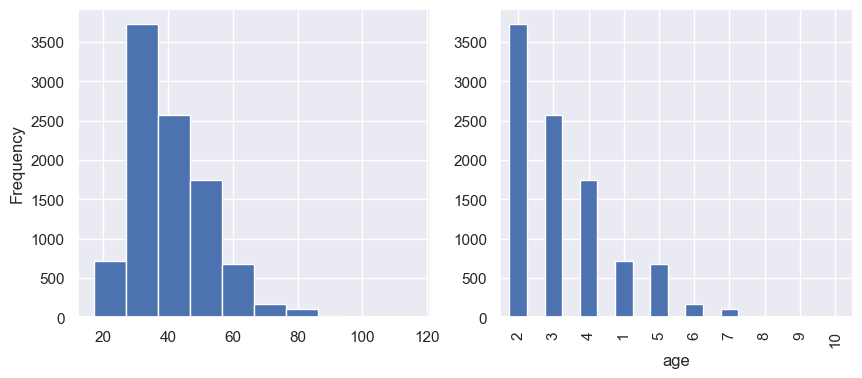

In [56]:
## sandbox
data = ori_data.copy()

## transform
bins = 10
data.age = (pd.cut(
    data.age, 
    bins = bins,
    labels = list(range(1, bins + 1))))

## check (compare before and after)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ori_data.age.plot.hist(ax=axes[0])
data.age.value_counts().plot.bar(ax=axes[1]);

##### Custom Binning (EXTRA)

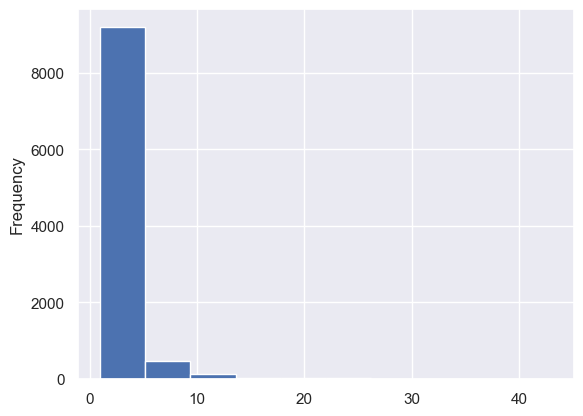

In [58]:
## sandbox
data = ori_data.copy()

## check before
data.campaign.plot.hist();

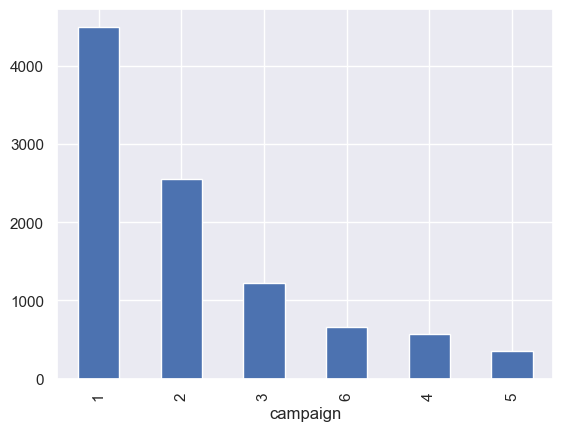

In [59]:
## transform
data.campaign = np.where(data.campaign <= 5, data.campaign, 6)

## check after
data.campaign.value_counts().plot.bar();

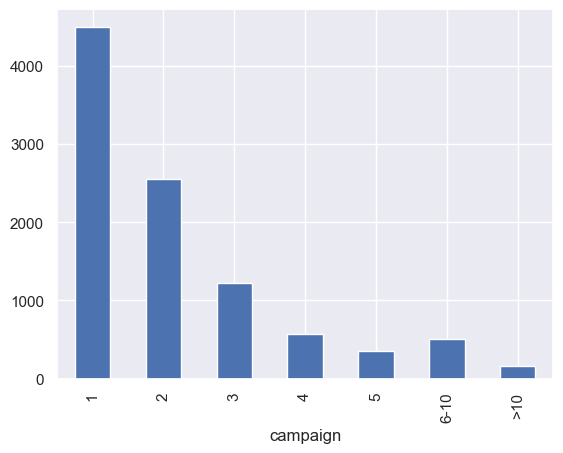

In [60]:
## with different ranges (pandas.cut())

## sandbox
data = ori_data.copy()

## transform
data.campaign = pd.cut(
    data.campaign, 
    bins = [0, 1, 2, 3, 4, 5, 10, 1000], 
    labels = [1, 2, 3, 4, 5, '6-10', '>10'])

## check after
data.campaign.value_counts(sort=False).plot.bar();

### Bereinigen von Variablennamen

In [62]:
## sandbox: create dummy variables
data = pd.get_dummies(ori_data)

## check variablen names beginning with "job_"
print(data.columns[data.columns.str.contains('job_')].tolist())

['job_admin.', 'job_blue collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed']


In [63]:
## create a list with dubious names, using regex
old_names = data.columns
old_names = old_names[old_names.str.contains('[^a-zA-Z0-9_]')]
print(old_names.tolist()) ## check

['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'job_admin.', 'job_blue collar', 'job_self-employed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree']


In [64]:
## create new names, using regex
new_names = old_names.str.replace('[^a-zA-Z0-9_]', '_', regex=True)
print(new_names.tolist()) ## check

['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'nr_employed', 'job_admin_', 'job_blue_collar', 'job_self_employed', 'education_basic_4y', 'education_basic_6y', 'education_basic_9y', 'education_high_school', 'education_professional_course', 'education_university_degree']


In [65]:
## rename variables using the lists created above
for i in range(len(old_names)):
    data.rename(columns={old_names[i]:new_names[i]}, inplace=True)

## check variablen names beginning with "job_"
print(data.columns[
    data.columns.str.contains('job_')
].tolist())

['job_admin_', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self_employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed']


### Ändern von Datentypen

In [67]:
## change data type of age from float to int

## sandbox
##   cast on NAs causes now runtime error
#data = ori_data.copy()
data = ori_data.copy().dropna()

## check before
print(np.dtype(data.age))

## change type
data['age'] = np.int32(data['age'])

## check after
print(np.dtype(data.age))

float64
int32
